# Example of the ABCD method with arbitrary dataset distributions.

This code block are the initialization and imports that are needed. Simulation parameters can be changed here as desired. This program will generate a random distribution of data points, with a linear correlation between the two variables. The target correlation strength can be adjusted as desired -- set to 0.00 for a totally uncorrelated function. Since the ABCD method works for weakly correlated functions, adjusting the correlation beyond 1% may result in large deviations from the predicted background vs. the actual background.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plot
import math

random.seed()

# hardcoded values that are adjustable easily from here

x = np.array([20, 100]) # interval of allowed values for x
y = np.array([20, 100]) # interval of allowed values for y

xcut = 60 # x-coordinate of vertical cut
ycut = 65 # y-coordinate of horizontal cut

events = 10000 # number of events to generate

r = 0.005 # target correlation strength

X = np.vstack((x, y)).T

#initialize variables we'll need later

acount = 0 # events in signal sector
bcount = 0 # events in background 1
ccount = 0 # events in background 2
dcount = 0 # events in background 3

means = []
stdvs = []
covs = []

The following code block creates the distribution by generating a covariance matrix and using it to generate the coordinates along a vector.

In [9]:
means = lambda x, y : [x.mean(), y.mean()]
stdvs = lambda x, y : [x.std() / 3, y.std() / 3]

covs = [[stdvs(x, y)[0]**2, stdvs(x, y)[0] * stdvs(x, y)[1] * r],
        [stdvs(x, y)[1] * stdvs(x, y)[0] * r, stdvs(x, y)[1]**2]]

m = np.random.multivariate_normal(means(x, y), covs, events).T

This input cell will plot the data as a scatter plot.

Plot and data produced. 



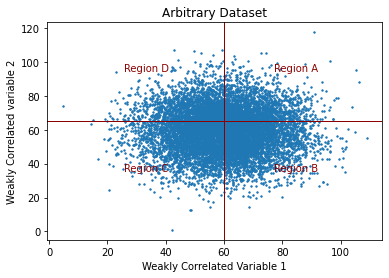

In [10]:
plot.scatter(m[0], m[1], s=2)
plot.axvline(x=xcut, c='darkred', lw=1)
plot.axhline(y=ycut, c='darkred', lw=1)
plot.title("Arbitrary Dataset")
plot.xlabel("Weakly Correlated Variable 1")
plot.ylabel("Weakly Correlated variable 2")
plot.annotate("Region A",
             xy=(xcut,ycut),
              textcoords="offset points",
              xytext=(50,50),
              c='darkred'
             )
plot.annotate("Region B",
             xy=(xcut,ycut),
              textcoords="offset points",
              xytext=(50,-50),
              c='darkred'
             )
plot.annotate("Region C",
             xy=(xcut,ycut),
              textcoords="offset points",
              xytext=(-100,-50),
              c='darkred'
             )
plot.annotate("Region D",
             xy=(xcut,ycut),
              textcoords="offset points",
              xytext=(-100,50),
              c='darkred'
             )

print("Plot and data produced.", "\n")

This final input block performs the ABCD analysis on the plot. It outputs the number of events in each quadrant, and performs an analysis with cross-ratios.

In [11]:
axcount = m[0] >= xcut
aycount = m[1] > ycut
agroup = axcount*1 + aycount*1
acount = np.count_nonzero(agroup == 2)

bxcount = m[0] > xcut
bycount = m[1] <= ycut
bgroup = bxcount*1 + bycount*1
bcount = np.count_nonzero(bgroup == 2)

cxcount = m[0] <= xcut
cycount = m[1] < ycut
cgroup = cxcount*1 + bycount*1
ccount = np.count_nonzero(cgroup == 2)

dxcount = m[0] < xcut
dycount = m[1] >= ycut
dgroup = dxcount*1 + dycount*1
dcount = np.count_nonzero(dgroup == 2)

projectedacount = round(bcount * dcount / ccount, 2)
projectederror = round(math.sqrt(projectedacount), 2)

print(" There are", acount, "data points in sector A.", "\n",
     "There are", bcount, "data points in sector B.", "\n",
     "There are", ccount, "data points in sector C.", "\n",
     "There are", dcount, "data points in sector D.", "\n",
     "The ABCD method predicts", projectedacount, u"\u00b1", projectederror, "data points in sector A.")

 There are 1707 data points in sector A. 
 There are 3266 data points in sector B. 
 There are 3271 data points in sector C. 
 There are 1756 data points in sector D. 
 The ABCD method predicts 1753.32 ± 41.87 data points in sector A.
